### Import libraries required and download data

In [1]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import talib
from IPython.display import display
import mplfinance as mpf
import seaborn as sns
import matplotlib.pyplot as plt

# disable chained assignments
pd.options.mode.chained_assignment = None 

# download data
stock_id = 'AAPL'
start_date = '2001-01-01'
end_date = '2021-12-31'
df = pdr.DataReader(stock_id, data_source='yahoo', start=start_date, end=end_date)

C:\Users\WEI CHIEH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Calculate Bollinger Band and %BB

In [2]:
# BBand
df['upper'], df['middle'], df['lower'] = talib.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

# Bandwidth
df['bandwidth'] = (df['upper'] - df['lower']) / df['middle']
df['B_bandwidth'] = df['bandwidth'].shift(1)

# %BB
df['%BB'] = ((df['Close'] - df['lower']) / (df['upper'] - df['lower'])) * 100
df

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,bandwidth,B_bandwidth,%BB
Date,,,,,,,,,,,,
2001-01-02,0.272321,0.260045,0.265625,0.265625,452312000.0,0.227448,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,0.297991,0.257813,0.258929,0.292411,817073600.0,0.250384,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,0.330357,0.300223,0.323940,0.304688,739396000.0,0.260896,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,0.310268,0.286830,0.302455,0.292411,412356000.0,0.250384,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,0.303292,0.284598,0.302455,0.295759,373699200.0,0.253251,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540,183.279656,171.4630,159.646345,0.137833,0.149173,87.519082
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859,183.508992,172.4155,161.322008,0.128683,0.137833,80.984352
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749,184.103940,173.1195,162.135060,0.126900,0.128683,78.497152


### Divide data into train data and test data

In [3]:
train = df.loc[start_date:'2018-12-31']
test = df.loc['2019-01-01':end_date]

print('Train data')
display(train.head())

print('Test data')
display(test.head())

Train data


,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,bandwidth,B_bandwidth,%BB
Date,,,,,,,,,,,,
2001-01-02,0.272321,0.260045,0.265625,0.265625,452312000.0,0.227448,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,0.297991,0.257813,0.258929,0.292411,817073600.0,0.250384,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,0.330357,0.300223,0.323940,0.304688,739396000.0,0.260896,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,0.310268,0.286830,0.302455,0.292411,412356000.0,0.250384,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,0.303292,0.284598,0.302455,0.295759,373699200.0,0.253251,NaN,NaN,NaN,NaN,NaN,NaN


Test data


,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,bandwidth,B_bandwidth,%BB
Date,,,,,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.277523,45.514812,40.987250,36.459689,0.220925,0.229771,33.354718
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.464798,44.908158,40.454375,36.000593,0.220188,0.220925,-5.086597
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.936085,44.442236,40.099000,35.755764,0.216626,0.220188,15.072107
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.856098,43.982293,39.764125,35.545958,0.212159,0.216626,17.028018
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.539619,43.707268,39.542375,35.377482,0.210655,0.212159,27.732020


# Train Data

### Set up entry signals in train data set

In [4]:
df1 = train

buy = []
buy_mark = []

for i in range(len(df1)):
    if df1['B_bandwidth'][i] < 0.08 and df1['bandwidth'][i] > 0.09 and df1['%BB'][i] > 95:
        buy.append(1)
        buy_mark.append(df1["High"][i] + 5)
    else:
        buy.append(0)
        buy_mark.append(np.nan)

df1['buy'] = buy
df1["buy_mark"] = buy_mark

buy_df = df1.loc[df1['buy'] == 1]

display(buy_df)
print("Total buy:", len(buy_df))

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,bandwidth,B_bandwidth,%BB,buy,buy_mark
Date,,,,,,,,,,,,,,
2003-02-18,0.273214,0.262857,0.263393,0.272679,2.908976e+08,0.233488,0.269166,0.257188,0.245209,0.093149,0.076883,114.664353,1,5.273214
2005-07-14,1.500357,1.436786,1.456786,1.455357,2.096060e+09,1.246185,1.419152,1.353107,1.287063,0.097619,0.070447,127.409682,1,6.500357
2005-08-15,1.726071,1.658929,1.660000,1.702857,1.086728e+09,1.458112,1.645347,1.561571,1.477795,0.107297,0.079624,134.323495,1,6.726071
2007-07-05,4.748929,4.596071,4.600000,4.741071,1.453052e+09,4.059656,4.608525,4.376321,4.144117,0.106118,0.074760,128.540815,1,9.748929
2009-09-16,6.526786,6.352857,6.356786,6.495357,7.540232e+08,5.561806,6.355750,6.072518,5.789285,0.093283,0.073787,124.645242,1,11.526786
2011-07-05,12.493929,12.232143,12.250000,12.479643,3.550540e+08,10.685991,12.325023,11.791768,11.258513,0.090445,0.076715,114.497725,1,17.493929
2016-03-03,25.427500,25.112499,25.145000,25.375000,1.478228e+08,23.462065,25.225114,24.130625,23.036136,0.090714,0.077604,106.847327,1,30.427500
2016-09-15,28.932501,28.372499,28.465000,28.892500,3.599344e+08,27.022640,28.208253,26.964500,25.720747,0.092251,0.066598,127.507351,1,33.932501
2017-10-31,42.412498,41.735001,41.974998,42.259998,1.441872e+08,40.222225,41.483853,39.546125,37.608397,0.097998,0.077402,120.027192,1,47.412498


Total buy: 10


### Set up exit signals in train data set

In [5]:
buy_date = buy_df.index
# print(buy_date)

count = df1['Close'].count()
sell = [0] * count
df1["sell"] = sell

sell_mark = [np.nan] * count
df1["sell_mark"] = sell_mark
# display(df1)

for i in range(len(buy_df)):
    try:
        temp_df = df1.loc[buy_date[i]:buy_date[i+1]]
        
        for i in range(len(temp_df)):
            if temp_df['Open'][i] < temp_df['middle'][i] or temp_df['Close'][i] < temp_df['middle'][i]:
                df1.loc[temp_df.index[i],'sell'] = -1
                df1.loc[temp_df.index[i],'sell_mark'] = df1.loc[temp_df.index[i],'Low'] - 5
                break
    except:
        temp_df = df1.loc[buy_date[i]:df1.index[-1]]
        
        for i in range(len(temp_df)):
            if temp_df['Open'][i] < temp_df['middle'][i] or temp_df['Close'][i] < temp_df['middle'][i]:        
                df1.loc[temp_df.index[i],'sell'] = -1 
                df1.loc[temp_df.index[i],'sell_mark'] = df1.loc[temp_df.index[i],'Low'] - 5
                break
    
sell_df = df1.loc[df1['sell'] == -1]

display(sell_df)
print("Total sell:",len(sell_df))

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,bandwidth,B_bandwidth,%BB,buy,buy_mark,sell,sell_mark
Date,,,,,,,,,,,,,,,,
2003-02-26,0.268214,0.258571,0.267679,0.258929,2.170952e+08,0.221714,0.271066,0.261027,0.250988,0.076917,0.076586,39.551255,0,NaN,-1,-4.741429
2005-10-06,1.910357,1.816786,1.900000,1.846429,7.575372e+08,1.581050,1.958144,1.864714,1.771284,0.100208,0.108117,40.214439,0,NaN,-1,-3.183214
2007-07-31,5.124286,4.697143,5.106071,4.705714,1.762393e+09,4.029380,5.250715,4.887250,4.523785,0.148740,0.177197,25.027071,0,NaN,-1,-0.302857
2009-10-28,7.072143,6.825000,7.061071,6.871429,8.183868e+08,5.883827,7.369629,6.888286,6.406943,0.139757,0.144106,48.248996,0,NaN,-1,1.825000
2011-08-04,13.975714,13.476786,13.907500,13.477500,8.714076e+08,11.540436,14.713161,13.569125,12.425089,0.168623,0.176962,45.995531,0,NaN,-1,8.476786
2016-04-18,27.237499,26.735001,27.222500,26.870001,2.432860e+08,24.844362,28.223222,27.198250,26.173278,0.075370,0.078247,33.987406,0,NaN,-1,21.735001
2016-10-26,28.924999,28.327499,28.577499,28.897499,2.645368e+08,27.027317,29.915910,28.916750,27.917590,0.069106,0.070360,49.036642,0,NaN,-1,23.327499
2017-11-29,43.230000,41.790001,43.157501,42.369999,1.666656e+08,40.471889,44.444296,43.108500,41.772704,0.061974,0.062583,22.357258,0,NaN,-1,36.790001
2018-09-10,55.462502,54.117500,55.237499,54.582500,1.580660e+08,52.736031,57.467859,54.602500,51.737142,0.104953,0.113871,49.651006,0,NaN,-1,49.117500


Total sell: 9


### Visualize the train data, entry signal and exit signal

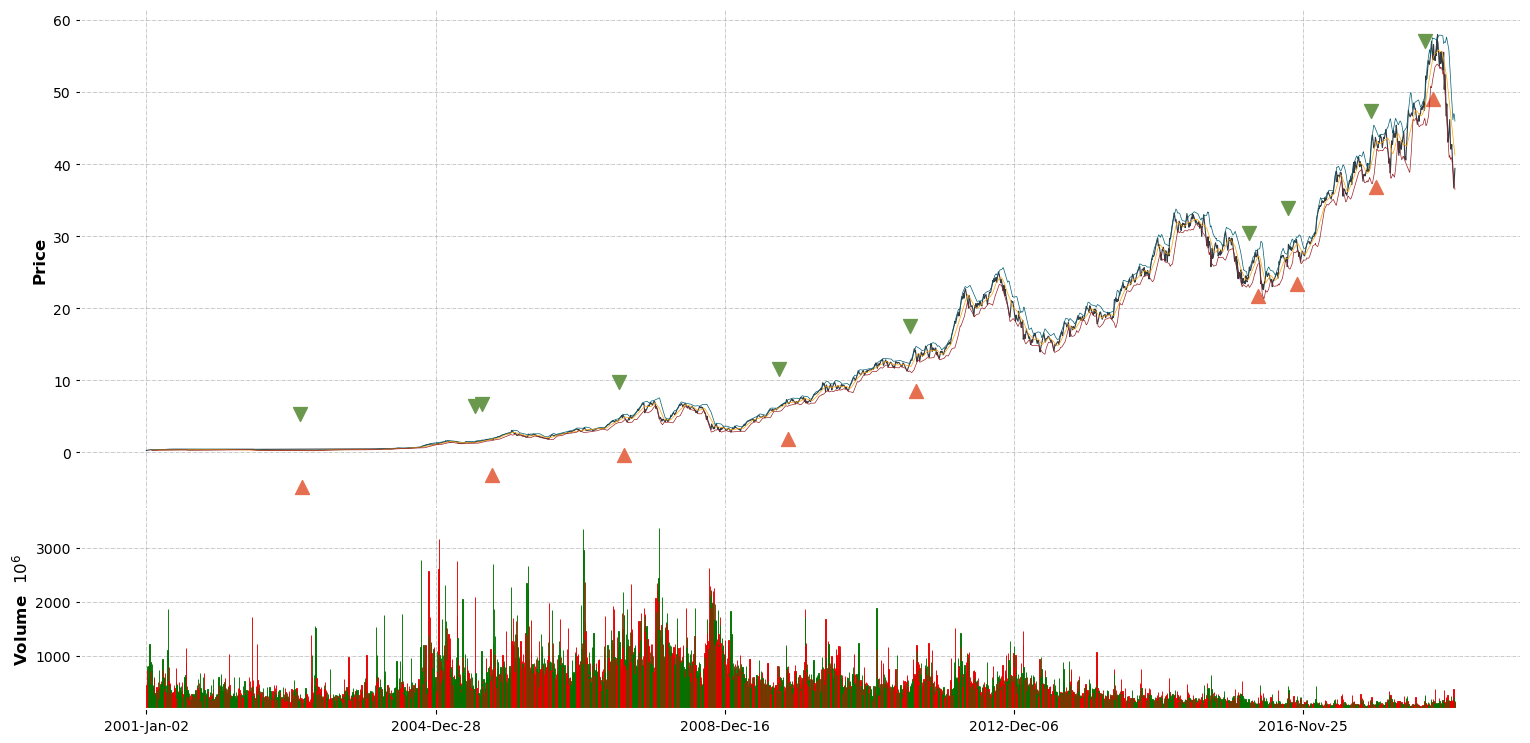

In [6]:
df = df1

df.index  = pd.DatetimeIndex(df.index)
mc = mpf.make_marketcolors(up='g', down='r', inherit=True)
s = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=mc, gridaxis='both',
                        gridstyle='-.', y_on_right=False,)
add_plot = [mpf.make_addplot(df["buy_mark"], scatter=True, markersize=100, marker='v', color='#6a994e'),
            mpf.make_addplot(df["sell_mark"], scatter=True, markersize=100, marker='^', color='#e76f51'),
            mpf.make_addplot(df["upper"], color="#005f73", width=0.5),
            mpf.make_addplot(df["middle"], color="#faa307", width=0.5),
            mpf.make_addplot(df["lower"], color="#9b2226", width=0.5)]

kwargs = dict(type='line', linecolor='#343a40', xrotation=0, volume = True, figsize=(20, 10), style=s, addplot=add_plot)
mpf.plot(df, **kwargs)

### Calculate returns of each transactions

In [7]:
return_rate = []

for i in range(len(buy_df)):
    try:
        rate = round((sell_df["Close"][i] - buy_df["Close"][i]) / buy_df["Close"][i] * 100, 2)
        return_rate.append(rate)
    except:
        rate = round((df1['Close'][-1] - buy_df["Close"][i]) / buy_df["Close"][i] * 100, 2)
        return_rate.append(rate)
        
# print(return_rate)

return_all = sorted(return_rate, reverse=True)

print("The highest return: " + str(return_all[0]) + " %")
print("The lowest return: " + str(return_all[-1]) + " %")

return_df = pd.DataFrame(return_rate)
# display(return_df)
train_std = return_df[0].std()
train_var = return_df[0].var()
print('standard deviation:', train_std)
print('skewness: ', return_df[0].skew())
print('kurtosis: ', return_df[0].kurtosis())

# return_all

The highest return: 176.34 %
The lowest return: -23.94 %
standard deviation: 61.67975451204931
skewness:  0.8997173989113872
kurtosis:  0.24248174024671076


In [8]:
win = len([i for i in return_rate if i > 0])
lose = len([i for i in return_rate if i <= 0])
train_sum = len(return_rate)

print("Total win: " + str(win))
print("Total loss: " + str(lose))
print("Total trades: " + str(win + lose))
print("Win rate : " + str(round(win / train_sum*100, 2)) + "%")

Total win: 8
Total loss: 2
Total trades: 10
Win rate : 80.0%


In [9]:
cum_return = [0]
annualized_return = []

for i in range(len(return_rate)):
    cum = round(return_rate[i] + cum_return[i],2)
    cum_return.append(cum)     

    try:
        trade_days = sell_df.index[i] - buy_df.index[i]
        trade_days = str(trade_days).replace(' days 00:00:00', '')
        annualized = (1 + (return_rate[i]/100) )**(250/int(trade_days)) - 1
        annualized_return.append(annualized)
    except:
        trade_days = df1.index[-1] - buy_df.index[i]
        trade_days = str(trade_days).replace(' days 00:00:00', '')
        annnualized = (1 + (return_rate[i]/100) )**(250/int(trade_days)) - 1
        annualized_return.append(annualized) 

# print(annualized_return)
train_avg_return = round((sum(annualized_return)/train_sum)*100,2)
print("Total return: " + str(cum_return[-1]) + "%")
print("Avg annualized rate of return: " + str(train_avg_return) + "%")

sharpe = ( train_avg_return - 3) / return_df[0].std()
print("Sharpe Ratio:", sharpe)

Total return: 531.65%
Avg annualized rate of return: 20.34%
Sharpe Ratio: 0.28112952357183235


In [10]:
sp500 = pdr.DataReader('^GSPC', data_source='yahoo', start=start_date, end=end_date)

sp500_train = sp500.loc[start_date:'2018-12-31']
sp500_test = sp500.loc['2019-01-01':end_date]

benchmark = []

for i in range(len(sp500_train)):
    return_h = round((sp500_train["Close"].shift(-1)[i] - sp500_train["Close"][i]) / sp500_train["Close"][i] * 100,2)
    benchmark.append(return_h)

cum_benchmark = [0]
days = len(sp500_train)
for i in range(len(benchmark)):
    cum = round(benchmark[i] + cum_benchmark[i],2)
    cum_benchmark.append(cum)

sp500_train_return = cum_benchmark[-2]

print("Total rate of return of S&P 500 :" + str(sp500_train_return) + "%")
print("Annualized of S&P 500:" + str(round((1 + cum_benchmark[-2])**(1/(days/250)) - 1, 2)) + "%")

Total rate of return of S&P 500 :99.11%
Annualized of S&P 500:0.29%


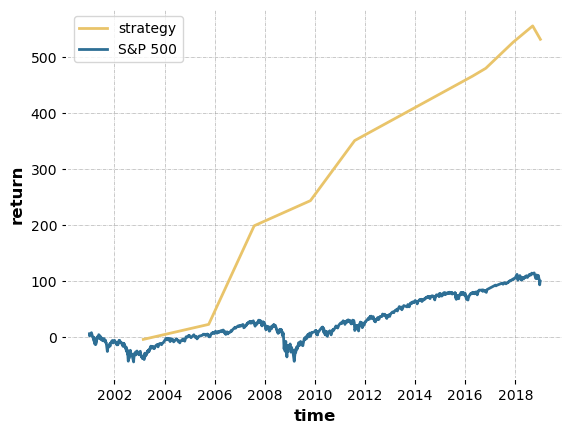

In [11]:
try:
    cum_return_df = pd.DataFrame(cum_return[1:], index=sell_df.index)
    cum_buyhold_df = pd.DataFrame(cum_benchmark[1:], index=df1.index)
    plt.plot(cum_return_df, "r-", color='#e9c46a', label="strategy")
    plt.plot(cum_buyhold_df, "b-", color='#2e6f95', label="S&P 500")
    plt.xlabel("time")
    plt.ylabel("return")
    plt.legend(loc='upper left')
    plt.show()
except:
    new = df1.index[-1]
    sell_df.loc[new] = np.zeros(len(sell_df.columns))
    cum_return_df = pd.DataFrame(cum_return[1:], index=sell_df.index)
    cum_buyhold_df = pd.DataFrame(cum_benchmark[1:], index=df1.index)
    plt.plot(cum_return_df, "-", color='#e9c46a', label="strategy")
    plt.plot(cum_buyhold_df, "-", color='#2e6f95', label="S&P 500")
    plt.xlabel("time")
    plt.ylabel("return")
    plt.legend(loc='upper left')
    plt.show()


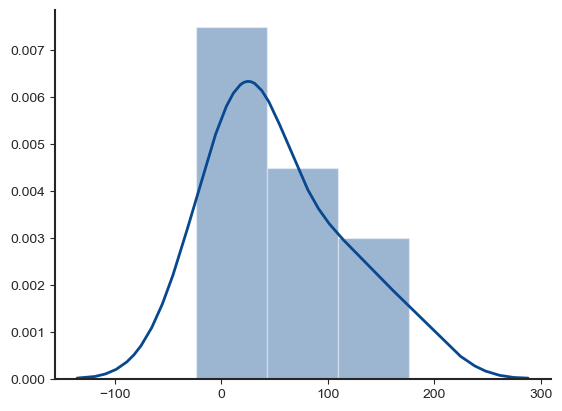

In [12]:
sns.set_palette(sns.color_palette("Blues_r", 10))
sns.set_style("ticks")

# normal distribution
sns.distplot(return_rate, kde=True,)
sns.despine()

train_return_rate = return_rate

# Test Data

### Set up entry signals in test data set

In [13]:
df1 = test

buy = []
buy_mark = []

for i in range(len(df1)):
    if df1['B_bandwidth'][i] < 0.08 and df1['bandwidth'][i] > 0.09 and 95 < df1['%BB'][i]:
        buy.append(1)
        buy_mark.append(df1["High"][i] + 5)
    else:
        buy.append(0)
        buy_mark.append(np.nan)

df1['buy'] = buy
df1["buy_mark"] = buy_mark

buy_df = df1.loc[df1['buy'] == 1]

display(buy_df)
print("Total buy:", len(buy_df))

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,bandwidth,B_bandwidth,%BB,buy,buy_mark
Date,,,,,,,,,,,,,,
2019-09-11,55.927502,54.432499,54.517502,55.897499,177158400.0,54.844604,54.990604,52.365750,49.740896,0.100251,0.079149,117.275147,1,60.927502
2021-04-08,130.389999,128.520004,128.949997,130.360001,88844600.0,129.589783,128.747338,123.123000,117.498661,0.091361,0.076612,114.336466,1,135.389999
2021-06-22,134.080002,131.619995,132.130005,133.979996,74783600.0,133.414612,133.476660,127.721999,121.967338,0.090112,0.078330,104.373284,1,139.080002


Total buy: 3


### Set up exit signals in test data set

In [14]:
buy_date = buy_df.index
# print(buy_date)

count = df1['Close'].count()
sell = [0] * count
df1["sell"] = sell

sell_mark = [np.nan] * count
df1["sell_mark"] = sell_mark
# display(df1)

for i in range(len(buy_df)):
    try:
        temp_df = df1.loc[buy_date[i]:buy_date[i+1]]
        
        for i in range(len(temp_df)):
            if temp_df['Open'][i] < temp_df['middle'][i] or temp_df['Close'][i] < temp_df['middle'][i]:
                df1.loc[temp_df.index[i],'sell'] = -1
                df1.loc[temp_df.index[i],'sell_mark'] = df1.loc[temp_df.index[i],'Low'] - 5
                break
    except:
        temp_df = df1.loc[buy_date[i]:df1.index[-1]]
        
        for i in range(len(temp_df)):
            if temp_df['Open'][i] < temp_df['middle'][i] or temp_df['Close'][i] < temp_df['middle'][i]:
                df1.loc[temp_df.index[i],'sell'] = -1 
                df1.loc[temp_df.index[i],'sell_mark'] = df1.loc[temp_df.index[i],'Low'] - 5
                break
    
sell_df = df1.loc[df1['sell'] == -1]

display(sell_df)
print("Total sell:",len(sell_df))

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,bandwidth,B_bandwidth,%BB,buy,buy_mark,sell,sell_mark
Date,,,,,,,,,,,,,,,,
2019-10-02,55.895000,54.482498,55.764999,54.740002,138449200.0,53.708908,56.494697,54.857000,53.219302,0.059708,0.072436,46.427969,0,NaN,-1,49.482498
2021-04-30,133.559998,131.070007,131.779999,131.460007,109839500.0,130.683304,137.589604,132.253501,126.917397,0.080695,0.101496,42.564855,0,NaN,-1,126.070007
2021-07-29,146.550003,144.580002,144.690002,145.639999,56699500.0,145.025421,150.975489,145.103500,139.231512,0.080935,0.094709,54.568291,0,NaN,-1,139.580002


Total sell: 3


### Visualize the test data, entry signal and exit signal

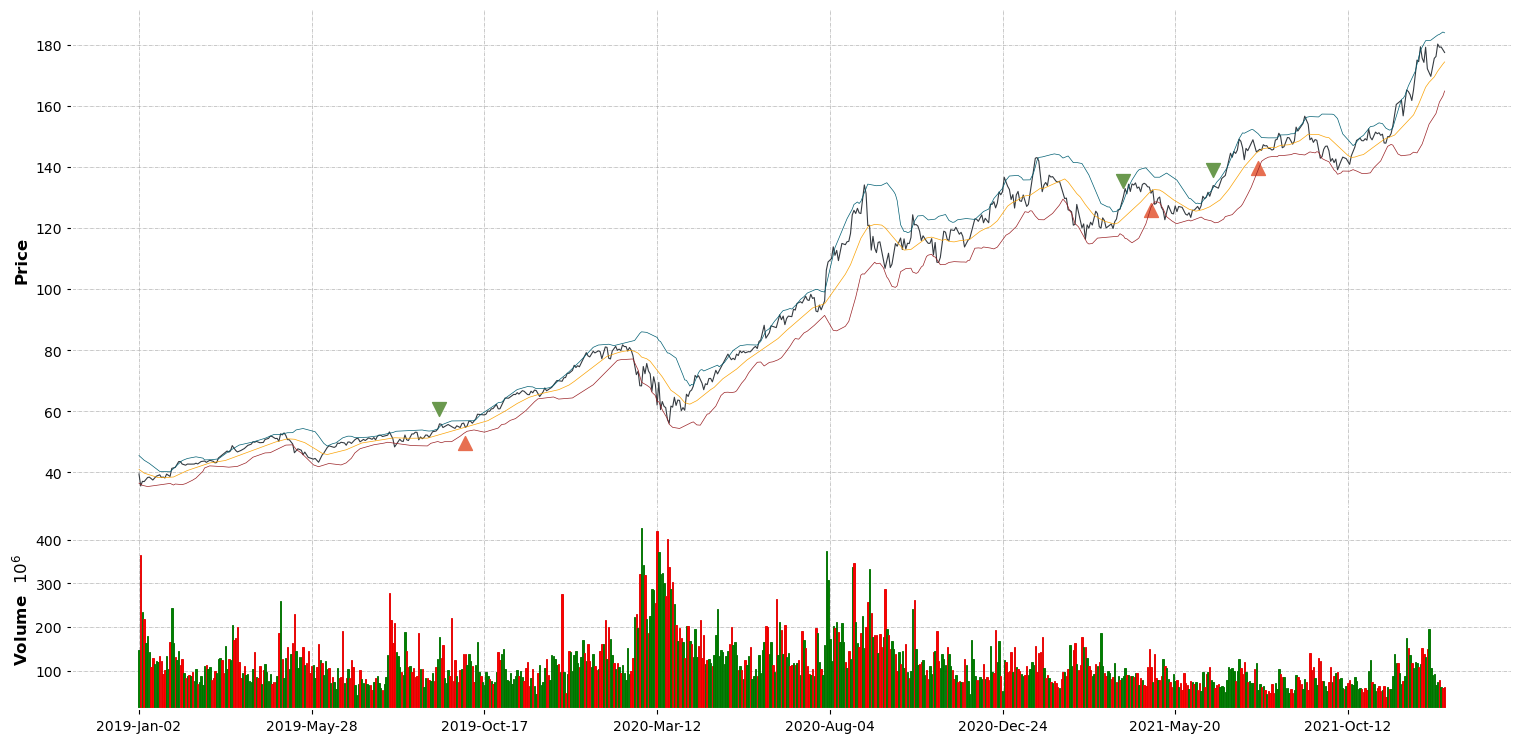

In [15]:
df = df1

df.index  = pd.DatetimeIndex(df.index)
mc = mpf.make_marketcolors(up='g', down='r', inherit=True)
s = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=mc, gridaxis='both',
                        gridstyle='-.',
                        y_on_right=False,)
add_plot = [mpf.make_addplot(df["buy_mark"], scatter=True, markersize=100, marker='v', color='#6a994e'),
            mpf.make_addplot(df["sell_mark"], scatter=True, markersize=100, marker='^', color='#e76f51'),
            mpf.make_addplot(df["upper"], color="#005f73", width=0.5),
            mpf.make_addplot(df["middle"], color="#faa307", width=0.5),
            mpf.make_addplot(df["lower"], color="#9b2226", width=0.5)]

kwargs = dict(type='line', linecolor='#343a40', xrotation=0, volume = True, figsize=(20, 10), style=s, addplot=add_plot)
mpf.plot(df, **kwargs)

### Calculate returns of each transactions

In [16]:
return_rate = []

for i in range(len(buy_df)):
    try:
        rate = round((sell_df["Close"][i] - buy_df["Close"][i]) / buy_df["Close"][i] * 100, 2)
        return_rate.append(rate)
    except:
        rate = round((df1['Close'][-1] - buy_df["Close"][i]) / buy_df["Close"][i] * 100, 2)
        return_rate.append(rate)
        
# print(return_rate)

return_all = sorted(return_rate, reverse=True)

print("The highest return: " + str(return_all[0]) + " %")
print("The lowest return: " + str(return_all[-1]) + " %")

return_df = pd.DataFrame(return_rate)
# display(return_df)
test_std = return_df[0].std()
test_var = return_df[0].var()
print('standard deviation:', test_std)
print('skewness: ', return_df[0].skew())
print('kurtosis: ', return_df[0].kurtosis())

# return_all

The highest return: 8.7 %
The lowest return: -2.07 %
standard deviation: 5.571364285343402
skewness:  1.2158170606982357
kurtosis:  nan


In [17]:
win = len([i for i in return_rate if i > 0])
lose = len([i for i in return_rate if i <= 0])
test_sum = len(return_rate)

print("Total win: " + str(win))
print("Total loss: " + str(lose))
print("Total trades: " + str(win + lose))
print("Win rate : " + str(round(win / test_sum*100,2)) + "%")

Total win: 2
Total loss: 1
Total trades: 3
Win rate : 66.67%


In [18]:
cum_return = [0]
annualized_return = []

for i in range(len(return_rate)):
    cum = round(return_rate[i] + cum_return[i],2)
    cum_return.append(cum)

    try:
        trade_days = sell_df.index[i] - buy_df.index[i]
        trade_days = str(trade_days).replace(' days 00:00:00', '')
        annualized = (1 + (return_rate[i]/100) )**(250/int(trade_days)) - 1
        annualized_return.append(annualized)
    except:
        trade_days = df1.index[-1] - buy_df.index[i]
        trade_days = str(trade_days).replace(' days 00:00:00', '')
        annnualized = (1 + (return_rate[i]/100) )**(250/int(trade_days)) - 1
        annualized_return.append(annualized) 

# print(annualized_return)
test_avg_return = round((sum(annualized_return)/test_sum)*100,2)

print("Total return: " + str(cum_return[-1]) + "%")
print("Avg annualized rate of return: " + str(test_avg_return) + "%")

sharpe = ( test_avg_return - 3) / return_df[0].std()
print("Sharpe Ratio:", sharpe)

Total return: 7.47%
Avg annualized rate of return: 21.21%
Sharpe Ratio: 3.268499252132028


In [19]:
benchmark = []

for i in range(len(sp500_test)):
    return_h = round((sp500_test["Close"].shift(-1)[i] - sp500_test["Close"][i]) / sp500_test["Close"][i] * 100,2)
    benchmark.append(return_h)

cum_benchmark = [0]
days = len(sp500_test)
for i in range(len(benchmark)):
    cum = round(benchmark[i] + cum_benchmark[i],2)
    cum_benchmark.append(cum)

sp500_test_return = cum_benchmark[-2]

print("Total rate of return of S&P 500 :" + str(sp500_test_return) + "%")
print("Annualized of S&P 500:" + str(round((1 + cum_benchmark[-2])**(1/(days/250)) - 1, 2)) + "%")

Total rate of return of S&P 500 :71.71%
Annualized of S&P 500:3.12%


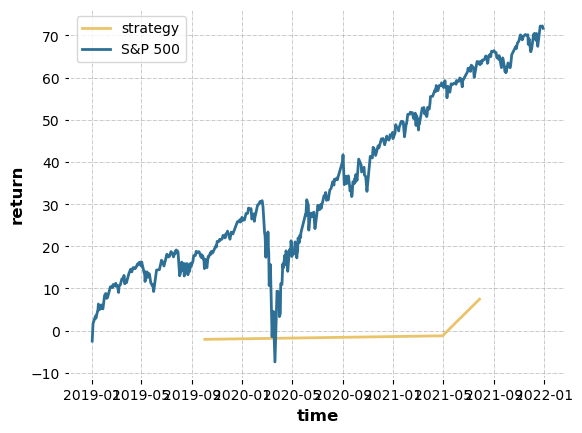

In [20]:
try:
    cum_return_df = pd.DataFrame(cum_return[1:], index=sell_df.index)
    cum_buyhold_df = pd.DataFrame(cum_benchmark[1:], index=df1.index)
    plt.plot(cum_return_df, "r-", color='#e9c46a', label="strategy")
    plt.plot(cum_buyhold_df, "b-", color='#2e6f95', label="S&P 500")
    plt.xlabel("time")
    plt.ylabel("return")
    plt.legend(loc='upper left')
    plt.show()
except:
    new = df1.index[-1]
    sell_df.loc[new] = np.zeros(len(sell_df.columns))
    cum_return_df = pd.DataFrame(cum_return[1:], index=sell_df.index)
    cum_buyhold_df = pd.DataFrame(cum_benchmark[1:], index=df1.index)
    plt.plot(cum_return_df, "-", color='#e9c46a', label="strategy")
    plt.plot(cum_buyhold_df, "-", color='#2e6f95', label="S&P 500")
    plt.xlabel("time")
    plt.ylabel("return")
    plt.legend(loc='upper left')
    plt.show()

# print(cum_return_df)


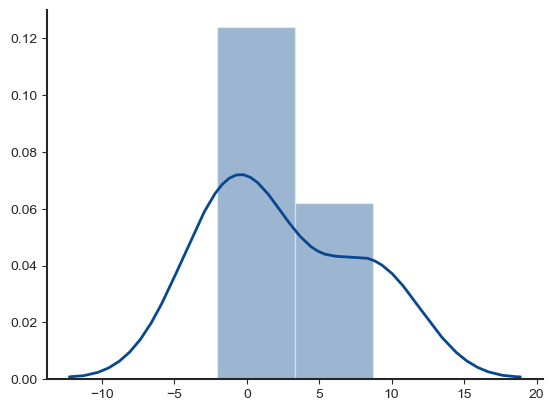

In [21]:
sns.set_palette(sns.color_palette("Blues_r", 10))
sns.set_style("ticks")

# normal distribution
sns.distplot(return_rate, kde=True)
sns.despine()

test_return_rate = return_rate

# Hypothesis test


### Test whether the mean return of train data outperform S&P 500

In [22]:
import scipy.stats as sst

test_sta, p_value = sst.ttest_1samp(a=train_return_rate, popmean=sp500_train_return)

print('Test statisti:', test_sta)
print('P-value:', p_value)

Test statisti: -2.3555678560305107
P-value: 0.04291186023613467


In [23]:
if p_value > 0.05:
    print("Since p-value > 0.05, we do not reject null hypothesis, which means the mean return of train data is not outperform S&P 500.")
else:
    print("Since p-value < 0.05, we reject null hypothesis, which means the mean return of train data is outperform S&P 500.")


Since p-value < 0.05, we reject null hypothesis, which means the mean return of train data is outperform S&P 500.


### Test whether the mean return of test data outperform S&P 500

In [24]:
test_sta, p_value = sst.ttest_1samp(a=train_return_rate, popmean=sp500_test_return)

print('Test statisti:', test_sta)
print('P-value:', p_value)

Test statisti: -0.9507891150307064
P-value: 0.36654433820700993


In [25]:
if p_value > 0.05:
    print("Since p-value > 0.05, we do not reject null hypothesis, which means the mean return of test data is not outperform S&P 500.")
else:
    print("Since p-value < 0.05, we reject null hypothesis, which means the mean return of test data is outperform S&P 500.")


Since p-value > 0.05, we do not reject null hypothesis, which means the mean return of test data is not outperform S&P 500.


# Regression

### using regression to compute the strategy's beta

In [26]:
df = pd.DataFrame()

trade_date = ['2003-02-18','2005-07-14','2005-08-15','2007-07-05','2009-09-16','2011-07-05','2016-03-03','2016-09-15','2017-10-31','2018-08-02','2019-09-11','2021-04-08','2021-06-22']

df['Date'] = ['2003-02-26','2005-10-06','2007-07-31','2009-10-28','2011-08-04','2016-04-18','2016-10-26','2017-11-29','2018-09-10','2018-12-31','2019-10-02','2021-04-30','2021-07-29']
df['strategy'] = train_return_rate+ test_return_rate
df['strategy'] = df['strategy']/100
df

,Date,strategy
0,2003-02-26,-0.0504
1,2005-10-06,0.2687
2,2007-07-31,1.7634
3,2009-10-28,0.4493
4,2011-08-04,1.0749
5,2016-04-18,1.1531
6,2016-10-26,0.1388
7,2017-11-29,0.4665
8,2018-09-10,0.2916
9,2018-12-31,-0.2394


In [27]:
tickers = ['^GSPC', '^IRX']

data = pd.DataFrame()

for t in tickers:
    data[t] = pdr.DataReader(t, data_source='yahoo', start=start_date, end=end_date)['Adj Close']

data['^IRX'] = data['^IRX']/(100*250)
data.head()

,^GSPC,^IRX
Date,,
2001-01-02,1283.270020,0.000227
2001-01-03,1347.560059,0.000221
2001-01-04,1333.339966,0.000210
2001-01-05,1298.349976,0.000199
2001-01-08,1295.859985,0.000202


In [28]:
gspc_pct_change = []
rf = []

for i in range(len(df)):
    temp_1 = data['^GSPC'].loc[trade_date[i]]
    temp_2 = data['^GSPC'].loc[df['Date'][i]]
    temp_pct = (temp_2-temp_1)/temp_1
    gspc_pct_change.append(temp_pct)

    temp_rf = data['^IRX'].loc[df['Date'][i]]
    rf.append(temp_rf)

In [29]:
df['^GSPC'] = gspc_pct_change
df['^IRX'] = rf
df

,Date,strategy,^GSPC,^IRX
0,2003-02-26,-0.0504,-0.027750,4.728000e-05
1,2005-10-06,0.2687,-0.028545,1.404800e-04
2,2007-07-31,1.7634,0.179435,1.924000e-04
3,2009-10-28,0.4493,-0.316487,2.400000e-06
4,2011-08-04,1.0749,0.122862,4.000000e-07
5,2016-04-18,1.1531,0.565417,7.920000e-06
6,2016-10-26,0.1388,0.073257,1.252000e-05
7,2017-11-29,0.4665,0.222987,5.032000e-05
8,2018-09-10,0.2916,0.117219,8.332000e-05
9,2018-12-31,-0.2394,-0.113316,9.200000e-05


In [30]:
import statsmodels.api as sm

X1 = sm.add_constant(df['^GSPC']-df['^IRX'])
X1

,const,0
0,1.0,-0.027797
1,1.0,-0.028685
2,1.0,0.179243
3,1.0,-0.316490
4,1.0,0.122862
5,1.0,0.565409
6,1.0,0.073244
7,1.0,0.222936
8,1.0,0.117136
9,1.0,-0.113408


In [31]:
reg = sm.OLS(df['strategy']-df['^IRX'], X1).fit()
reg.summary()

# The strategy beta is 1.5774, and p-value is less than 0.05.
# The alpha is positive, which means the strategy outperform the market, but the p-value is greater than 0.05.

# 31.1% variations in this strategy return is due to systematic risk.

C:\Users\WEI CHIEH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     4.959
Date:                Sat, 05 Mar 2022   Prob (F-statistic):             0.0478
Time:                        13:51:58   Log-Likelihood:                -8.4026
No. Observations:                  13   AIC:                             20.81
Df Residuals:                      11   BIC:                             21.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3154      0.146      2.158      0.054      -0.006       0.637
0              1.5774      0.708      2.227      0.048       0.018       3.136
==============================================================================
Omnibus:                        7.998   Durbin-Watson:                   0.810
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                4.539
Skew:                           1.407   Prob(JB):                        0.103
Kurtosis:                       3.676   Cond. No.                         5.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
tickers = ['AAPL', '^GSPC', '^IRX']

data = pd.DataFrame()

for t in tickers:
    data[t] = pdr.DataReader(t, data_source='yahoo', start=start_date, end=end_date)['Adj Close']

returns = (data/data.shift(1)) -1
returns['^IRX'] = data['^IRX']/(100*250)
returns

,AAPL,^GSPC,^IRX
Date,,,
2001-01-02,NaN,NaN,0.000227
2001-01-03,0.100842,0.050099,0.000221
2001-01-04,0.041985,-0.010552,0.000210
2001-01-05,-0.040293,-0.026242,0.000199
2001-01-08,0.011450,-0.001918,0.000202
...,...,...,...
2021-12-27,0.022975,0.013839,0.000002
2021-12-28,-0.005767,-0.001010,0.000002
2021-12-29,0.000502,0.001402,0.000002


In [33]:
returns = returns.dropna(axis=0, how='any')
X1 = sm.add_constant(returns['^GSPC']-returns['^IRX'])

reg = sm.OLS(returns['AAPL']-returns['^IRX'], X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     2836.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:52:01   Log-Likelihood:                 13579.
No. Observations:                5276   AIC:                        -2.715e+04
Df Residuals:                    5274   BIC:                        -2.714e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.000      4.610      0.000       0.001       0.002
0              1.1010      0.021     53.254      0.000       1.061       1.142
==============================================================================
Omnibus:                      929.772   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14596.191
Skew:                           0.364   Prob(JB):                         0.00
Kurtosis:                      11.116   Cond. No.                         81.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Monte Carlo

In [37]:
rate = np.random.normal(df['strategy'].mean(), df['strategy'].std(), 10000)
print(rate)
print(df['strategy'].mean())
print(df['strategy'].std())

[ 0.17150313  1.08114772  0.33807391 ... -0.00236488  0.35657739
  1.53292005]
0.4147076923076923
0.5789909375536294


In [35]:
sst.describe(rate)

DescribeResult(nobs=10000, minmax=(-2.1501414349006263, 2.4415933307611004), mean=0.4015787587748226, variance=0.3336178213337997, skewness=-0.09485777555523618, kurtosis=0.10121269390347232)

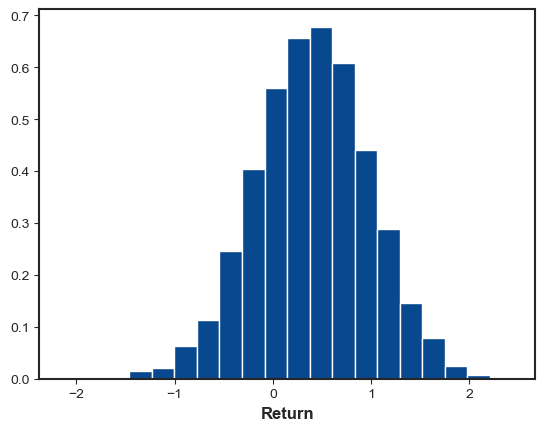

In [36]:
plt.hist(rate, bins=20, density=True)
plt.xlabel("Return")
plt.show()